<a href="https://colab.research.google.com/github/Sompote/COV_pile/blob/main/PileLSTM_22AUG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/pile_new.csv')

#ks = pd.concat([df, df2,df3]).reset_index(drop=True)

ks=pd.DataFrame()
#ks=df.iloc[::100, :].reset_index(drop=True)
#ks=ks.drop([0])
ks=df
ks

,Load (ton),Settlement(mm.),H-pile,W-pile,length,Nbase,start SS,Nave,Medium clay,Stiff clay
0,163.31,-0.561,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0
1,442.32,-1.656,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0
2,609.73,-2.081,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0
3,803.83,-2.964,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0
4,1005.24,-5.243,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0
...,...,...,...,...,...,...,...,...,...,...
251,2446.80,-34.856,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0
252,2511.79,-36.404,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0
253,2592.69,-38.233,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0
254,2600.53,-42.330,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ks.shape

(59, 7)

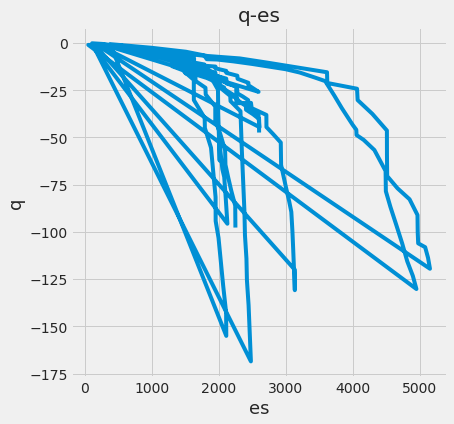

In [107]:
#plotdata
plt.figure(figsize=(6,6))
plt.title('q-es')
plt.plot(df['Load (ton)'],df['Settlement(mm.)'])
plt.xlabel('es', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()


In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def setup_data(ks,time_step):
  #setup train data
  #delta strain
#load driver
  ks['load_n']=ks.iloc[1:,0].reset_index(drop=True)
  ks['deform_n']=ks.iloc[time_step:,1].reset_index(drop=True)
  
  xi=ks.drop(['deform_n'], axis=1)
  #yi=ks[['qn']].copy()
  yi=ks[['deform_n']].copy()
  xi=xi.dropna()
  yi=yi.dropna()

  x_train1=xi.to_numpy()
  y_train1=yi.to_numpy()
  return x_train1, y_train1,xi

  #x_train1=x_train1[:y_train1.shape[0],:]

def scaler(xtrain1,y_train1):
  scaler_x = MinMaxScaler(feature_range=(-1,1))
  scaler_y = MinMaxScaler(feature_range=(-1,1))
  train_data_x = scaler_x.fit_transform(xtrain1)
  train_data_y=scaler_y.fit_transform(y_train1)
  return train_data_x, train_data_y, scaler_x, scaler_y


time_step=2
x_train1, y_train1,xi=setup_data(ks,time_step)
x_train1,y_train1,scaler_x, scaler_y=scaler(x_train1,y_train1)

In [69]:
x_train1.shape

(253, 11)

In [70]:
y_train1.shape

(253, 1)

In [71]:
x_train1[:,3]

array([-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
       -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
       -1. , -1. , -1. , -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
       -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
       -0.6, -0.6, -0.6, -0.6, -0.6,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
       -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ,
       -1. , -1. , -1. , -1. , -1. , -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
       -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
       -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
  

In [72]:
def time_step_data(dataset,timestep):
  from sklearn.preprocessing import MinMaxScaler, StandardScaler
  from sklearn.model_selection import train_test_split
  #output data predict
  datab=timestep
  x_train_time=dataset
  train_data_ini=dataset
  train_data=dataset
  #Create a new dataframe with only the 'Close column
  #scaler = MinMaxScaler(feature_range=(-1,1))
  #train_data = scaler.fit_transform(train_data_ini)
  x_train = []
  x_train_final=np.array([])

  data_length=train_data.shape[0]
  x_train = []
  train_data=x_train_time[:,0]
  for i in range(datab, data_length+1):
    x_train.append(train_data[i-datab:i])
  x_train_a = np.array(x_train)
  x_train_a = np.reshape(x_train_a, (x_train_a.shape[0], x_train_a.shape[1],1))
  x_train_final=x_train_a


  for a in range(1,x_train_time.shape[1]):
    x_train = []
    train_data=x_train_time[:,a]
    for i in range(datab, data_length+1):
      x_train.append(train_data[i-datab:i])
    x_train_a = np.array(x_train)
    x_train_a = np.reshape(x_train_a, (x_train_a.shape[0], x_train_a.shape[1]))
    x_train_final=np.dstack((x_train_final,x_train_a))
  return x_train_final 

data_x=time_step_data(x_train1,time_step)

In [7]:
data_x.shape

(252, 2, 11)

In [8]:
y_train1.shape

(253, 1)

In [73]:
def split_data(y_train1, data_x,test_split):
  #weight and scale
  from sklearn.preprocessing import MinMaxScaler, StandardScaler
  from sklearn.model_selection import train_test_split
  scaler2 = MinMaxScaler(feature_range=(-1,1))
  #scaler=StandardScaler()
  #scaler2=StandardScaler()
  #scaled_data2 = scaler2.fit_transform(y_train1)
  scaled_data2=y_train1
  y=scaled_data2
  x=data_x[:y_train1.shape[0],:]
  y=y[:x.shape[0],:]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_split,shuffle=False)
  #x_train= np.reshape(x_trainn, (x_trainn.shape[0], 1,x_trainn.shape[1]))
  #x_test= np.reshape(x_test, (x_test.shape[0], 1,x_test.shape[1]))
  return  x_train, x_test, y_train, y_test
test_split=0.0001
x_train, x_test, y_train, y_test=split_data(y_train1, data_x,test_split)

In [ ]:
x_train[55, :,:]

array([[ 0.90747337, -0.47462276,  1.        ,  1.        , -1.        ,
        -1.        , -1.        ,  0.91369783],
       [ 0.99502171, -1.        ,  1.        ,  1.        , -1.        ,
        -1.        , -1.        ,  0.91847319]])

In [ ]:
x

array([[[4.05518183e+01, 6.07832228e+01, 2.63879049e-01, 1.58918675e-01],
        [4.76778236e+01, 6.52331078e+01, 4.22797724e-01, 1.55331021e-01],
        [6.64020593e+01, 6.18493098e+01, 5.78128745e-01, 1.77344860e-01]],

       [[4.76778236e+01, 6.52331078e+01, 4.22797724e-01, 1.55331021e-01],
        [6.64020593e+01, 6.18493098e+01, 5.78128745e-01, 1.77344860e-01],
        [1.05989080e+02, 5.87127632e+01, 7.55473605e-01, 1.60726852e-01]],

       [[6.64020593e+01, 6.18493098e+01, 5.78128745e-01, 1.77344860e-01],
        [1.05989080e+02, 5.87127632e+01, 7.55473605e-01, 1.60726852e-01],
        [1.35893413e+02, 5.70141442e+01, 9.16200457e-01, 1.70729228e-01]],

       [[1.05989080e+02, 5.87127632e+01, 7.55473605e-01, 1.60726852e-01],
        [1.35893413e+02, 5.70141442e+01, 9.16200457e-01, 1.70729228e-01],
        [1.71418273e+02, 6.24429645e+01, 1.08692969e+00, 1.63769182e-01]],

       [[1.35893413e+02, 5.70141442e+01, 9.16200457e-01, 1.70729228e-01],
        [1.71418273e+02, 6.244

Epoch 1/200
84/84 [==============================] - 2s 10ms/step - loss: 0.1189 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 2/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0496 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 3/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0308 - accuracy: 0.0000e+00 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Epoch 4/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0197 - accuracy: 0.0000e+00 - val_loss: 2.8034e-04 - val_accuracy: 0.0000e+00
Epoch 5/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0219 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 6/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0133 - accuracy: 0.0040 - val_loss: 7.3810e-04 - val_accuracy: 0.0000e+00
Epoch 7/200
84/84 [==============================] - 1s 7ms/step - loss: 0.0174 - accuracy: 0.0000e+0

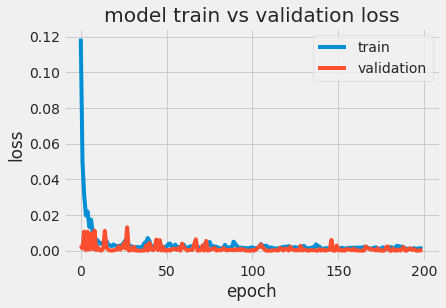

In [74]:
#train model
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Flatten
from matplotlib import pyplot as plt


#Build the LSTM model
model = Sequential()
model.add(LSTM(200, activation="relu",return_sequences=True, use_bias=True,input_shape= (x_train.shape[1],x_train.shape[2])))
model.add(Flatten())
#model.add(LSTM(100, return_sequences= False))
model.add(Dense(200))




model.add(Dense(y_train.shape[1]))
# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

#Train the model
history=model.fit(x_train, y_train, batch_size=3,validation_data=(x_test, y_test), verbose=1,epochs=200)

# plot train and validation loss
#plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.save('strain.h5')

In [38]:
xi

,Load (ton),Settlement(mm.),H-pile,W-pile,length,Nbase,start SS,Nave,Medium clay,Stiff clay,load_n
0,163.31,-0.561,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,442.32
1,442.32,-1.656,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,609.73
2,609.73,-2.081,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,803.83
3,803.83,-2.964,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,1005.24
4,1005.24,-5.243,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,1177.52
...,...,...,...,...,...,...,...,...,...,...,...
250,2440.41,-32.549,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2446.80
251,2446.80,-34.856,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2511.79
252,2511.79,-36.404,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2592.69
253,2592.69,-38.233,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2600.53


In [39]:
xi

,Load (ton),Settlement(mm.),H-pile,W-pile,length,Nbase,start SS,Nave,Medium clay,Stiff clay,load_n
0,163.31,-0.561,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,442.32
1,442.32,-1.656,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,609.73
2,609.73,-2.081,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,803.83
3,803.83,-2.964,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,1005.24
4,1005.24,-5.243,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,1177.52
...,...,...,...,...,...,...,...,...,...,...,...
250,2440.41,-32.549,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2446.80
251,2446.80,-34.856,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2511.79
252,2511.79,-36.404,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2592.69
253,2592.69,-38.233,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2600.53


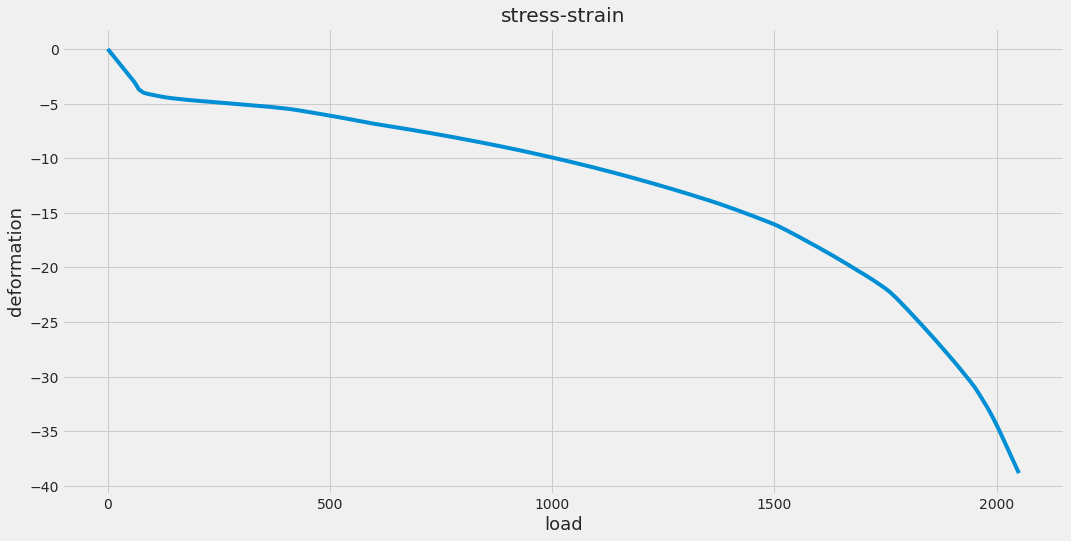

In [112]:
#predict next days

from tensorflow import keras
from pandas_datareader.data import DataReader
model = keras.models.load_model('strain.h5')
time_step=2
output=pd.DataFrame()
predict_step=200
n_features=11
load_increment=10
strain=0
ks=df

ini1=np.array([10,-0.02,1.2,1.2,43.6,70,16,50,12,16,30]) #initial [q,p,strain,strain_increment]
ini2=np.array([60,-0.03,1.2,1.2,43.6,70,16,50,12,16,30])

'''ini1=np.array([2,50,0.01,strain_increment]) #initial [q,p,strain,strain_increment]
ini2=np.array([20,50, 0.02,strain_increment])
#ini3=np.array([400,50,0.03,strain_increment])'''

ini=np.vstack((ini1,ini2))
#output = output.append(({'q': ini[time_step-1,0],'p':ini[time_step-1,1], 'es':ini[time_step-1,2]}),ignore_index=True)
#output = output.append(({'load': ini[time_step-1,0],'deform':ini[time_step-1,1]}),ignore_index=True)
output = output.append(({'load': 0,'deform':0}),ignore_index=True)


#ini=np.vstack((ini1,ini))
ini=scaler_x.transform(ini)
ini=np.reshape(ini,(time_step,n_features))

load=ini2[0]
for i in range(predict_step):
    #ini_scaled = scaler.transform(ini)
    ini_scaled = (ini)
    ini_model=np.reshape(ini_scaled,(1,time_step,n_features))
    predict = model.predict(ini_model)
    predict=np.reshape(predict,(1,predict.shape[1]))
    #pre_nonscale = scaler2.inverse_transform(predict)
    pre_nonscale=scaler_y.inverse_transform(predict)
    #output = output.append(({'q': pre_nonscale[0,0], 'es':ini[0,2]}),ignore_index=True)
    output = output.append(({'load': load,'deform':pre_nonscale[0,0]}),ignore_index=True)
    load +=load_increment
    new_step=np.array([load-load_increment,pre_nonscale[0,0],
                       ini2[2],ini2[3],ini2[4], ini2[5],ini2[6],ini2[7],ini2[8],ini2[9],load],dtype=object)
    new_step1=np.reshape(new_step,(1,new_step.shape[0]))

    new_step=scaler_x.transform(new_step1)
    ini_t=np.vstack((ini,new_step[0,:]))
    ini=ini_t[1:,:]
    #ini_model =np.vstack(ini_model)
    #slice=ini[0:time_step-1,:]

    ''' ini[1,2]=ini[0,2]
    ini[1,1]=ini[0,1]
    ini[1,0]=ini[0,0]

    ini[0,2]=ini[0,2]+strain_increment
    ini[0,0]=pre_nonscale[0,0]
    ini[0,1]=pre_nonscale[0,1]'''



#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(output['load'],output['deform'])
#plt.plot(df2['load'],df2['deform'],linewidth=0.2)
plt.xlabel('load', fontsize=18)
plt.ylabel('deformation', fontsize=18)
plt.show()




In [101]:
output

,deform,load
0,-0.030000,20.0
1,-3.032295,20.0
2,-3.713537,70.0
3,-4.131520,120.0
4,-4.458335,170.0
5,-4.674408,220.0
6,-4.851325,270.0
7,-5.029949,320.0
8,-5.174536,370.0
9,-5.337442,420.0


In [87]:
xi

,Load (ton),Settlement(mm.),H-pile,W-pile,length,Nbase,start SS,Nave,Medium clay,Stiff clay,load_n
0,163.31,-0.561,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,442.32
1,442.32,-1.656,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,609.73
2,609.73,-2.081,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,803.83
3,803.83,-2.964,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,1005.24
4,1005.24,-5.243,1.5,1.5,43.0,64.0,16.0,53.0,12.0,16.0,1177.52
...,...,...,...,...,...,...,...,...,...,...,...
250,2440.41,-32.549,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2446.80
251,2446.80,-34.856,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2511.79
252,2511.79,-36.404,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2592.69
253,2592.69,-38.233,1.8,1.8,40.0,64.0,16.0,53.0,12.0,16.0,2600.53


In [82]:
new_step1

array([[20.0, -2.63811, 1.5, 43.6, 70.0, 16.0, 50.0, 12.0, 16.0, 30.0,
        30.0]], dtype=object)

In [64]:
pre_nonscale

array([[665.27374]], dtype=float32)

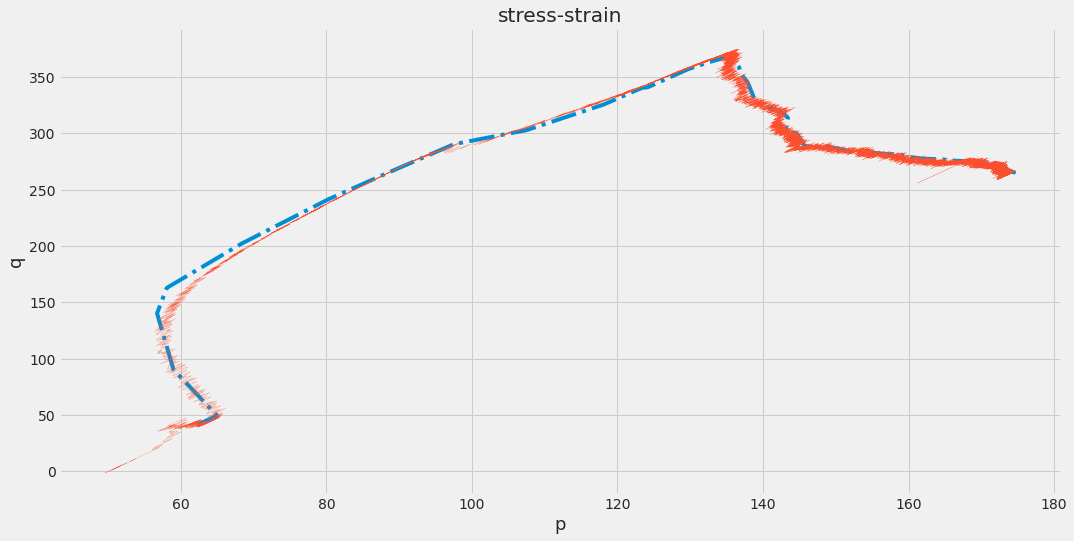

In [ ]:
ks=df.iloc[::100, :].reset_index(drop=True)
x_train1, y_train1=setup_data(ks,3)
x_train1=scaler_x.transform(x_train1)
data_x=time_step_data(x_train1,time_step)
test_split=0.01
x_train, x_test, y_train, y_test=split_data(y_train1, data_x,test_split)



predictn = model.predict(data_x)
predict = scaler_y.inverse_transform(predictn)


#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(predict[:,1],predict[:,0],'-.')
plt.plot(df['p'],df['q'],linewidth=0.2)
plt.xlabel('p', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()




In [ ]:
data_x.shape

(63, 2, 3)

In [ ]:
data_x[:-3,2,1].shape

(59,)

In [ ]:
y_train1[:,0]

array([135.8934126, 171.4182734, 208.9126744, 242.4961576, 273.6607199,
       293.4040413, 317.0235455, 338.8201007, 340.7129019, 356.6501807,
       363.7635419, 369.9033047, 366.743071 , 366.6533437, 360.9120666,
       354.7596425, 347.595437 , 335.3391653, 328.007656 , 325.1653376,
       324.9672836, 320.6558696, 316.0828298, 303.7676063, 300.8993341,
       301.4995037, 292.8681933, 290.7151174, 284.85126  , 289.391682 ,
       289.0540334, 285.6796094, 281.677066 , 287.1290756, 279.108155 ,
       283.580335 , 282.3979458, 276.2230637, 276.9549451, 275.7380117,
       277.1259129, 271.947342 , 275.9250663, 273.0348765, 276.0615374,
       275.7289717, 273.4239344, 271.304603 , 274.8583473, 271.1077286,
       270.6810244, 272.5911935, 269.0798889, 266.9265251, 267.5721172,
       263.0067536, 267.251459 , 262.4729177, 264.9332541])

In [ ]:
pre_nonscale

array([[31.383224, 62.58911 ]], dtype=float32)

In [ ]:
strain

5.009999999999999